<a href="https://colab.research.google.com/github/HemaRavi94/Exploratory-analysis/blob/main/assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.DataFrame(ground_cricket_data)
Regressor = linear_model.LinearRegression()
x=df[['Ground Temperature']]
y=df['Chirps/Second']
Regressor.fit(x,y)

print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(Regressor.coef_[0], Regressor.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


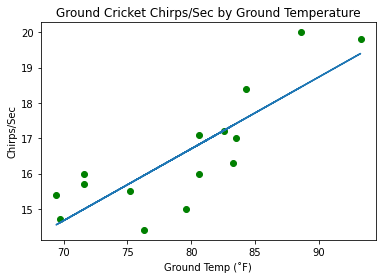

In [ ]:
plt.scatter(x,y,color='green')
plt.plot(x,Regressor.predict(x))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [ ]:
print('R^2 score for this equation: {:.4f}'
      .format(Regressor.score(x,y)))

R^2 score for this equation: 0.6923


Less than 0.8 not good to fit this data





In [ ]:
print('At 95˚F, our approximation of chirps/sec is: {:.4f}'.format(Regressor.predict(95)[0]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
def chirps_to_temp(y):
    ret = (y - Regressor.intercept_) / Regressor.coef_[0]
    print('observation of {} chirps/sec, '
          'we expect a temp of {:.2f}˚F'.format(y, ret))
chirps_to_temp(18)

observation of 18 chirps/sec, we expect a temp of 86.41˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
from sklearn.linear_model import LinearRegression
Reg=LinearRegression()
x=df[['Brain']]
y=df['Body']
Reg.fit(x,y)
print('Linear equation: y= {:.4f}*x+{:.4f}'.format(Reg.coef_[0],Reg.intercept_))

Linear equation: y= 0.9665*x+91.0044


Text(0, 0.5, 'Body Wt')

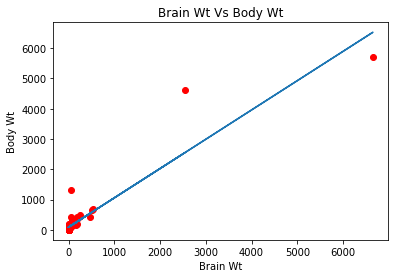

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
plt.plot(x,Reg.predict(x))
plt.title('Brain Wt Vs Body Wt')
plt.xlabel('Brain Wt')
plt.ylabel('Body Wt')

In [ ]:
print('R^2 equation: {:.4f}'.format(Reg.score(x,y)))

R^2 equation: 0.8727


Value is greater than 0.8 so it is good fit for this data

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
columns=["Sex", "Rank", "Year", "Degree", "YSdeg"]
from sklearn.linear_model import LinearRegression
def linear_equ(columns,df):
  Reg1=linear_model.LinearRegression()
  x=df[columns]
  y=df['Salary']
  Reg1.fit(x,y)
  print('Equation for columns{} with salary:\n' '{}+{}'.format(columns, Reg1.coef_,Reg1.intercept_))

print(linear_equ(columns,df))      

Equation for columns['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]+11410.14654725559
None


In [ ]:
def best_score_focus(columns, df, focus='Salary'):
    x = df[columns]
    y= df[focus]
    reg1 = linear_model.LinearRegression()
    reg1.fit(x,y)
    return reg1.score(x,y)
print('R^2 score for equation using all columns: {}'
      .format(best_score_focus(columns, df)))

R^2 score for equation using all columns: 0.8547180674410969


In [ ]:
import itertools as it
from copy import deepcopy
%matplotlib inline

def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]
combos = get_combos(columns)

def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[best_score_focus(list(n), df, focus)] = n
    return combo_scores

combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

From the observation wegot best score of R^2 equation (**0.8547180674410969**, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'))


In [ ]:
num_by_sex = df.Sex.value_counts()
print('No of men: {}\nNo of women: {}'.format(num_by_sex[0], num_by_sex[1]))

No of men: 38
No of women: 14


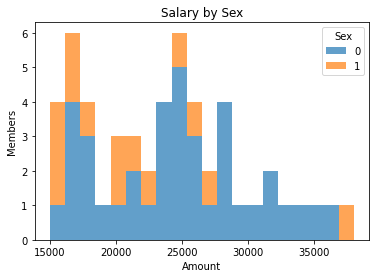

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Amount')
plt.ylabel('Members')
plt.show()

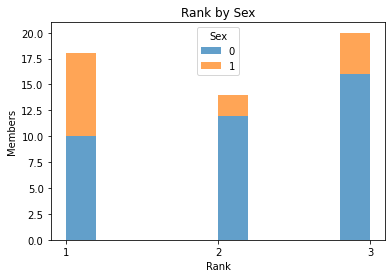

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Members')
plt.show()

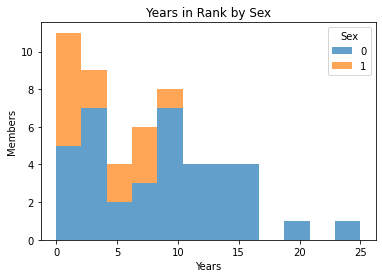

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Members')
plt.show()


Womens have  ranked top for past 10yrs.Let compare with men

In [ ]:
df_10 = df[df['Year'] <= 10]
combos_10 = get_combos(columns)
combo_10_scores = all_combo_scores(combos_10, df_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660304, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482044, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

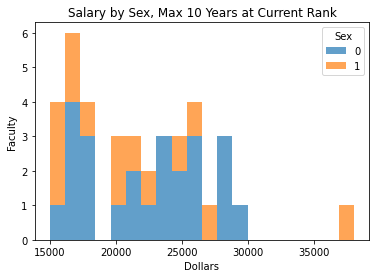

In [ ]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Amount')
plt.ylabel('Members')
plt.show()

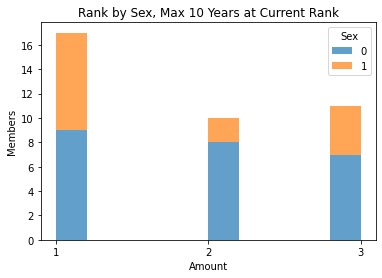

In [ ]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Amount')
plt.ylabel('Members')
plt.show()

In [ ]:
rank_columns = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_columns)
combo_rank_scores = all_combo_scores(combos_rank, df_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279376, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037697, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423391, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252243, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162727823, ('Degree',))]

As a result we see there is no salary discrimination by sex.
